# Mapa CDados 22.2 - Fernando Alzueta
## Sintaxe de alguns comandos
---

## Comandos para apenas uma variável
---

In [1]:
# Importando bibliotecas

#%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\fefea\Documents\GitHub\CD22-2\Cola CDados


In [2]:
dados = pd.read_excel('Discriminacao.xlsx') # Inicializando dataframe
dados.head(5) # Mostrando os 5 primeiros elementos

,Sexo,Anos,Salario
0,fem,9,39
1,fem,6,36
2,fem,10,40
3,fem,0,24
4,fem,9,36


In [3]:
dados.describe() # Tabela com varias infos
dados.value_counts().to_frame() # Tabela com frequência absoluta
display(dados.value_counts(normalize=True).to_frame()) # Tabela com frequência relativa

0
Sexo Anos Salario          
fem  0    24       0.014925
masc 12   33       0.014925
     2    24       0.014925
     3    31       0.014925
          35       0.014925
...                     ...
fem  14   45       0.014925
     15   40       0.014925
          52       0.014925
     17   42       0.014925
masc 27   64       0.014925

[67 rows x 1 columns]

In [4]:
print(dados.Anos.min(), dados.Anos.max())
lista_faixa = np.arange(0, 27, 3)
Faixa_anos = pd.cut(dados.Anos,lista_faixa, include_lowest=True).to_frame()
dados = dados.assign(Faixa = Faixa_anos)
display(dados)

0 27


,Sexo,Anos,Salario,Faixa
0,fem,9,39,"(6.0, 9.0]"
1,fem,6,36,"(3.0, 6.0]"
2,fem,10,40,"(9.0, 12.0]"
3,fem,0,24,"(-0.001, 3.0]"
4,fem,9,36,"(6.0, 9.0]"
...,...,...,...,...
62,masc,10,29,"(9.0, 12.0]"
63,masc,0,27,"(-0.001, 3.0]"
64,masc,11,31,"(9.0, 12.0]"
65,masc,2,24,"(-0.001, 3.0]"


In [5]:
Faixa_salario = pd.qcut(dados.Salario, 3, labels=["Mal Pago", "Ok", "Bem Pago"]).to_frame()
dados = dados.assign(FaixaS = Faixa_salario)
display(dados)

,Sexo,Anos,Salario,Faixa,FaixaS
0,fem,9,39,"(6.0, 9.0]",Ok
1,fem,6,36,"(3.0, 6.0]",Ok
2,fem,10,40,"(9.0, 12.0]",Ok
3,fem,0,24,"(-0.001, 3.0]",Mal Pago
4,fem,9,36,"(6.0, 9.0]",Ok
...,...,...,...,...,...
62,masc,10,29,"(9.0, 12.0]",Mal Pago
63,masc,0,27,"(-0.001, 3.0]",Mal Pago
64,masc,11,31,"(9.0, 12.0]",Mal Pago
65,masc,2,24,"(-0.001, 3.0]",Mal Pago


---
## Comandos para filtrar uma variavel
---

In [6]:
filtroM = dados['Sexo'] == 'masc'
filtroF = [not e for e in filtroM]

dados_M = dados.loc[filtroM, :]
dados_F = dados.loc[filtroF, :]
dados_M.head(5)

,Sexo,Anos,Salario,Faixa,FaixaS
32,masc,9,40,"(6.0, 9.0]",Ok
33,masc,20,46,"(18.0, 21.0]",Bem Pago
34,masc,3,35,"(-0.001, 3.0]",Ok
35,masc,20,55,"(18.0, 21.0]",Bem Pago
36,masc,12,56,"(9.0, 12.0]",Bem Pago


In [7]:
dados_ate5 = dados.iloc[0:5]
dados_ate5

,Sexo,Anos,Salario,Faixa,FaixaS
0,fem,9,39,"(6.0, 9.0]",Ok
1,fem,6,36,"(3.0, 6.0]",Ok
2,fem,10,40,"(9.0, 12.0]",Ok
3,fem,0,24,"(-0.001, 3.0]",Mal Pago
4,fem,9,36,"(6.0, 9.0]",Ok


---
## Comandos para relacionar várias variaveis
---

In [8]:
pd.crosstab(dados.FaixaS, dados.Faixa, normalize='columns')*100

Faixa,"(-0.001, 3.0]","(3.0, 6.0]","(6.0, 9.0]","(9.0, 12.0]","(12.0, 15.0]","(15.0, 18.0]","(18.0, 21.0]","(21.0, 24.0]"
FaixaS,,,,,,,,
Bem Pago,6.25,15.384615,10.0,44.444444,62.5,66.666667,50.0,100.0
Mal Pago,75.00,38.461538,20.0,33.333333,12.5,0.000000,0.0,0.0
Ok,18.75,46.153846,70.0,22.222222,25.0,33.333333,50.0,0.0


In [9]:
pd.crosstab(dados.FaixaS, dados.Sexo, normalize='index')*100

Sexo,fem,masc
FaixaS,,
Bem Pago,33.333333,66.666667
Mal Pago,56.521739,43.478261
Ok,52.173913,47.826087


In [10]:
pd.crosstab(dados.FaixaS, [dados.Sexo, dados.Faixa], normalize=True)

Sexo               fem                                                 \
Faixa    (-0.001, 3.0] (3.0, 6.0] (6.0, 9.0] (9.0, 12.0] (12.0, 15.0]   
FaixaS                                                                  
Bem Pago      0.000000   0.015385   0.000000    0.030769     0.046154   
Mal Pago      0.138462   0.030769   0.030769    0.000000     0.000000   
Ok            0.000000   0.061538   0.076923    0.030769     0.015385   

Sexo                           masc                                    \
Faixa    (15.0, 18.0] (-0.001, 3.0] (3.0, 6.0] (6.0, 9.0] (9.0, 12.0]   
FaixaS                                                                  
Bem Pago     0.015385      0.015385   0.015385   0.015385    0.030769   
Mal Pago     0.000000      0.046154   0.046154   0.000000    0.046154   
Ok           0.000000      0.046154   0.030769   0.030769    0.000000   

Sexo                                                          
Faixa    (12.0, 15.0] (15.0, 18.0] (18.0, 21.0] (21.0, 24.0]  
FaixaS                                                        
Bem Pago     0.030769     0.015385     0.030769     0.030769  
Mal Pago     0.015385     0.000000     0.000000     0.000000  
Ok           0.015385     0.015385     0.030769     0.000000

In [11]:
dados.cov() # Covariância

,Anos,Salario
Anos,46.946630,51.280868
Salario,51.280868,104.471280


In [12]:
dados.corr() # Correlação

,Anos,Salario
Anos,1.000000,0.732242
Salario,0.732242,1.000000


---
## Gráficos
---

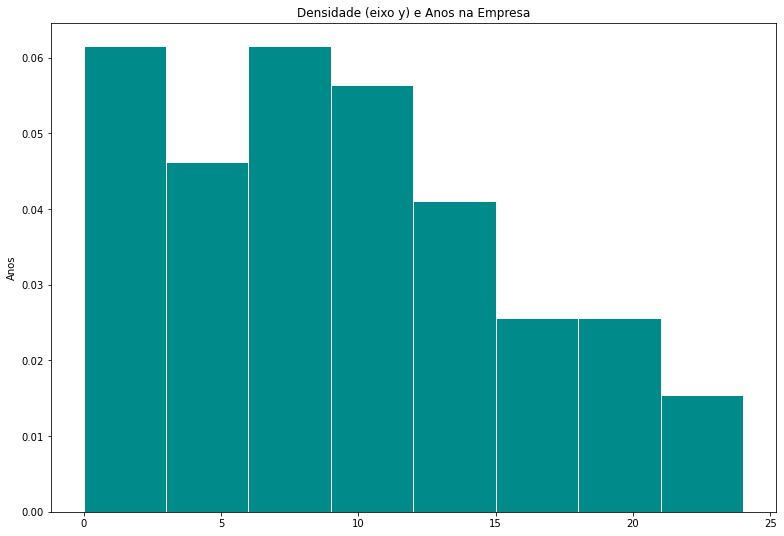

In [18]:
plt.figure(figsize=(13, 9))

plt.subplot(111)
plt.hist(dados.Anos, bins=lista_faixa, color='darkcyan', edgecolor='white', density=True)
plt.title('Densidade (eixo y) e Anos na Empresa')
plt.ylabel('Anos')
plt.show()

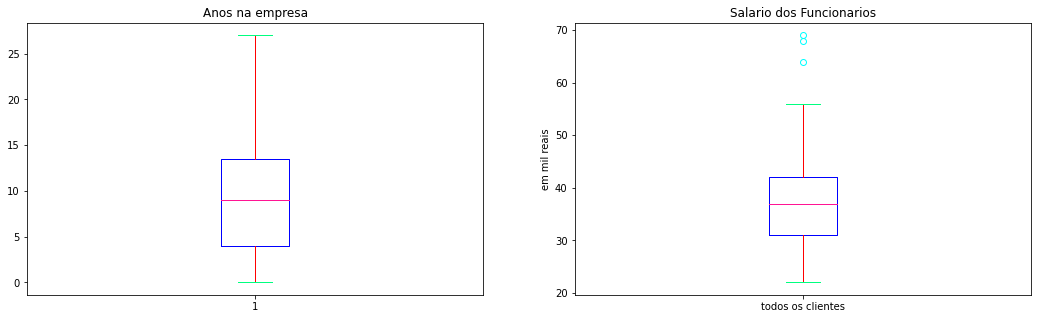

In [14]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.boxplot(dados.Anos,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='deeppink'),
            capprops=dict(color='springgreen'),
            whiskerprops=dict(color='red'),
            flierprops=dict(color='yellow', markeredgecolor='cyan')
            )
plt.title('Anos na empresa')

plt.subplot(1,2,2)
plt.boxplot(dados.Salario, labels = ['todos os clientes'],  
            boxprops=dict(color='blue'),
            medianprops=dict(color='deeppink'),
            capprops=dict(color='springgreen'),
            whiskerprops=dict(color='red'),
            flierprops=dict(color='yellow', markeredgecolor='cyan')
            )
plt.title('Salario dos Funcionarios')
plt.ylabel('em mil reais')

plt.show()